## Theoretical Framework:
This assessment aims to create a "Quality of Life Index" by combining multiple indicators from the World Happiness Report (2019) and the Human Development Report (2015). The goal of the Quality of Life Index is to measure and compare the overall well-being of people across different countries. This index takes into account several aspects which include economic stability, health and education.

### Why this Problem?
Quality of life is very important for human development and improvement in society. The usual economic indicators like GDP per capita only give a limited view by focusing primarily on economic performance. However, quality of life is a multifaceted concept that encompasses not only economic factors but also health, education, and social well-being. A composite index that brings together these parts will provide a more comprehensive and deep understanding for those in charge of making policies, governments, as well as worldwide groups.

### Selected Indicators:
The Quality of Life Index includes the following indicators, because they are important for measuring various elements that make up a good life:

### GDP per Capita:
Measures the average economic production per person, giving insight into how well the country is doing economically. It is a commonly used measure of economic stability and living standards.

Data Source: World Happiness Report (2019).

### Healthy Life Expectancy:
Measures the average number of years a person can expect to live in good health, which shows how well healthcare systems perform and the overall health of the populace.

Data Source: World Happiness Report (2019).

### Life Expectancy at Birth:
Represents the average number of years a newborn is expected to survive if current mortality rates continue, acting as an important gauge for a country’s healthcare and living conditions.

Data Source: Human Development Report (2015).

### Mean Years of Education:
Represents the average number of years of schooling that people aged 25 and more have completed, this can be seen as an indicator of how much education and human capital exist in the country's population.

Data Source: Human Development Report (2015).

### Gross National Income (GNI) per Capita:
Represents the total income earned by a country’s residents, providing a broader perspective on economic well-being beyond domestic production alone.

Data Source: Human Development Report (2015).

## Appropriateness of Selected Variables:

The selected indicators present a wide and fair perspective on the different elements that affect life quality. Economic signs like GDP per head and GNI per individual give understanding into economic conditions, while health indicators such as life expectancy and healthy life expectancy highlight the importance of good health and wellness. Education is also included by considering educational achievement, acknowledging its part in bettering life results.

These variables are interconnected, providing a multi-dimensional evaluation of the quality of life. For example, higher education levels often lead to better employment opportunities, which in turn can increase income and improve access to healthcare, ultimately extending life expectancy.

The data comes from reliable reports- World Happiness Report (2019) and Human Development Report (2015). This ensures that it is accurate, dependable and consistent across the different indicators.

### Conclusion:

The Quality of Life Index was created because we require a broader way of measurement for well-being that is better than usual economic gauges. 
By using the data on economic output, health and education, this index becomes a comprehensive tool for comparing life quality in various nations. It reveals both strong points and drawbacks within each country as well as guiding worldwide development efforts.

# Loading the Datasets

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

happiness_data = pd.read_csv("WorldHappinessReport2019.csv")

hdi_data = pd.read_csv("human_development.csv")

print("World Happiness Report Columns:")
print(happiness_data.columns)

print("\nHuman Development Report Columns:")
print(hdi_data.columns)

World Happiness Report Columns:
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Human Development Report Columns:
Index(['HDI Rank', 'Country', 'Human Development Index (HDI)',
       'Life Expectancy at Birth', 'Expected Years of Education',
       'Mean Years of Education', 'Gross National Income (GNI) per Capita',
       'GNI per Capita Rank Minus HDI Rank'],
      dtype='object')


# Data Selection:
The data for this project is selected from two reliable sources:
1. World Happiness Report (2019) - Provides indicators like GDP per capita, healthy life expectancy...
2. Human Development Report (2015) - Offers indicators such as Life Expectancy at Birth, Mean Years of Education, Gross National Income per Capita...


# Merge the datasets using the 'Country or region' and 'Country' columns

In [22]:
merged_data = pd.merge(happiness_data, hdi_data, left_on='Country or region', right_on='Country')
print(merged_data)

     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
130           151                     Yemen  3.380           0.287   
131           152                    Rwanda  3.334           0.359   
132           154               Afghanistan  3.203           0.350   
133           155  Central African Republic  3.083           0.026   
134           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1  

# Check for the number of missing values in each column

In [23]:
missing_values = merged_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handle missing data by imputing with mean values
# merged_data.fillna(merged_data.mean(), inplace=True)


Missing values in each column:
Overall rank                              0
Country or region                         0
Score                                     0
GDP per capita                            0
Social support                            0
Healthy life expectancy                   0
Freedom to make life choices              0
Generosity                                0
Perceptions of corruption                 0
HDI Rank                                  0
Country                                   0
Human Development Index (HDI)             0
Life Expectancy at Birth                  0
Expected Years of Education               0
Mean Years of Education                   0
Gross National Income (GNI) per Capita    0
GNI per Capita Rank Minus HDI Rank        0
dtype: int64


# Multivariate Analysis
We removed non-numeric data from the dataset because correlation analysis only works with numbers. Correlation measures the strength and direction of linear relationships between numerical variables. Non-numeric data, such as country names or categorical variables, cannot be processed in a correlation matrix. By focusing on numeric data, we can accurately see how different variables are connected, enabling us to identify which variables are most strongly correlated and should be prioritized in the composite index.

In [24]:
# Multivariate Analysis:
# Performing correlation analysis to understand relationships between variables
numeric_data = merged_data.select_dtypes(include=[float, int])

# Performing correlation analysis to understand relationships between variables
correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                    Overall rank     Score  GDP per capita  \
Overall rank                            1.000000 -0.989252       -0.818942   
Score                                  -0.989252  1.000000        0.814685   
GDP per capita                         -0.818942  0.814685        1.000000   
Social support                         -0.775060  0.783774        0.781955   
Healthy life expectancy                -0.812349  0.806007        0.831786   
Freedom to make life choices           -0.574644  0.593439        0.439626   
Generosity                             -0.073485  0.108815       -0.076718   
Perceptions of corruption              -0.409245  0.444568        0.343298   
HDI Rank                                0.835383 -0.831259       -0.949456   
Human Development Index (HDI)          -0.826660  0.822214        0.958739   
Life Expectancy at Birth               -0.800666  0.794908        0.838709   
Expected Years of Education            -0.7

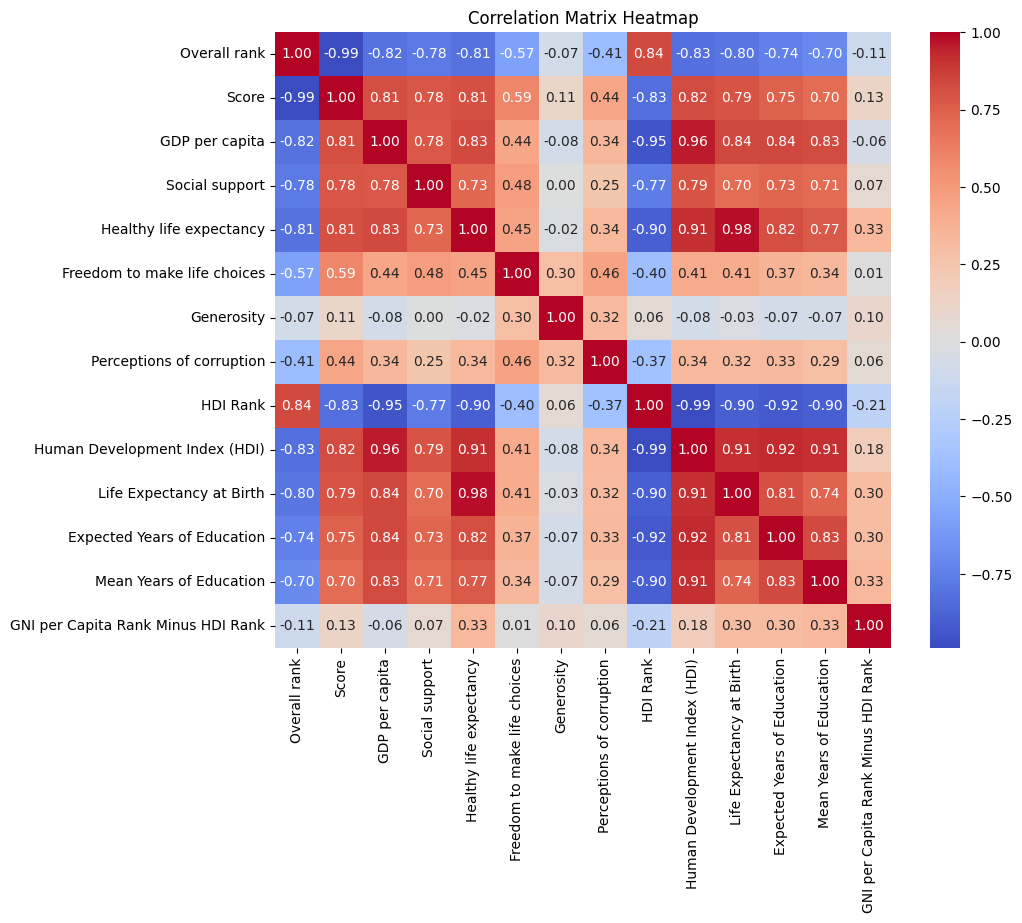

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Multivariate Analysis:
# Selecting only numeric columns for correlation analysis
numeric_data = merged_data.select_dtypes(include=[float, int])

# Performing correlation analysis
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Normalisation and Variable Selection
Normalization is a crucial step, it ensures that each variable in the 'Quality of Life Index' contributes fairly and are proportionate. This will lead to a balanced and accurate composite index, where no single variable disproportionately influences the outcome. As a result, the final index provides a reliable measure of overall well-being across different countries, integrating various aspects such as economic stability, health, and education.

The heatmap of the correlation matrix provided an insight into the relationship between the variables, highlighting how strongly they are correlated with each other. Variables like "Human Development Index (HDI)" and "Life Expectancy at Birth" showed a strong positive correlation, indicating that they move together. Normalizing the variables ensure that the relationship was preserved while preventing any variable from being disproportionate, influencing the composite index. Normalization ensures that each variable in the "Quality of Life Index" contributes fairly and proportionately, facilitating a balanced and meaningful composite measure of quality of life across different countries.

Variables Selection:
1. GDP per capita:
 GDP per capita shows a high positive correlation with "Score" (0.81) and "Human Development Index (HDI)" (0.96). This suggests that higher GDP per capita is strongly associated with better overall quality of life and development outcomes.

2. Healthy life expectancy:
 Healthy life expectancy correlates well with key indicators like "Life Expectancy at Birth" (0.98) and "Score" (0.78). This reflects the significance of health in determining quality of life.

3. Life Expectancy at Birth:
 Life expectancy at birth is crucial as it has almost perfect correlation with "Healthy life expectancy" (0.98) and a strong relationship with "Human Development Index (HDI)" (0.91). It directly impacts how long people live in good health.

4. Mean Years of Education:
 Education is a foundational aspect of human development. "Mean Years of Education" has a strong correlation with "Expected Years of Education" (0.91) and "Human Development Index (HDI)" (0.84), indicating its importance in overall quality of life.

5. Human Development Index (HDI):
 HDI itself is a composite indicator that combines several aspects of development including health, education, and income. It is highly correlated with GDP per capita, life expectancy, and education indicators, making it a crucial variable for assessing quality of life.

In [26]:
selected_columns = [
    'GDP per capita', 
    'Healthy life expectancy', 
    'Life Expectancy at Birth', 
    'Mean Years of Education', 
    'Human Development Index (HDI)'
]

selected_data = merged_data[selected_columns]

# Normalize the data using MinMaxScaler (scales data to the range [0, 1])
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(selected_data), columns=selected_columns)



# Weighting and Aggregation

In [27]:
weights = {
    'GDP per capita': 0.2,
    'Healthy life expectancy': 0.2,
    'Life Expectancy at Birth': 0.2,
    'Mean Years of Education': 0.2,
    'Human Development Index (HDI)': 0.2
}


# Create Composite Index

In [28]:
for column in selected_columns:
    normalized_data[column] *= weights[column]

# Sum the weighted variables to get the composite index
normalized_data['Quality of Life Index'] = normalized_data.sum(axis=1)




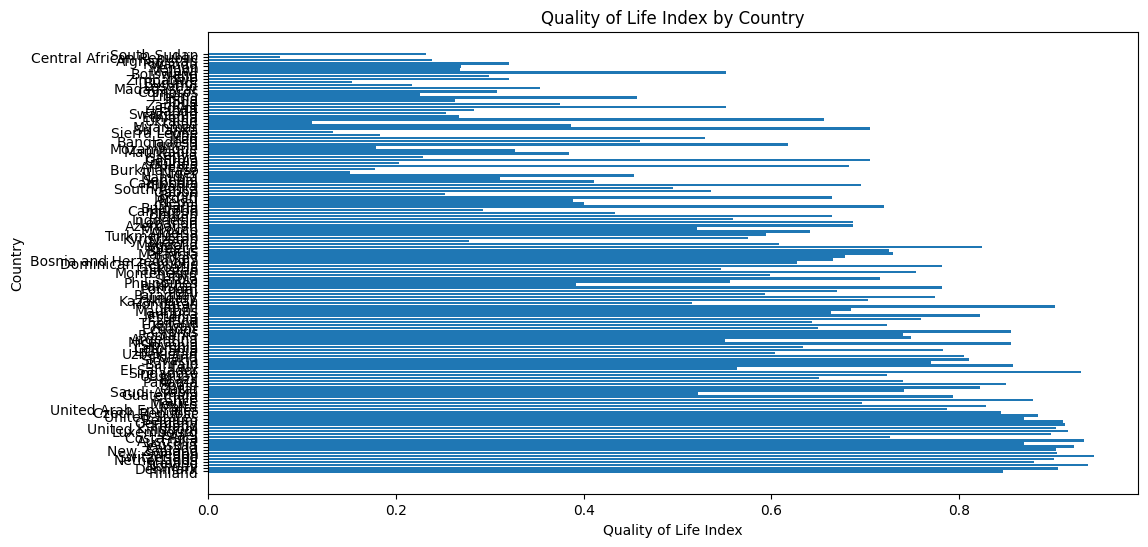

C:\Users\samto\AppData\Local\Temp\ipykernel_6080\3189911151.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quality of Life Index', y=merged_data.index, data=merged_data.sort_values('Quality of Life Index', ascending=False), palette='viridis')


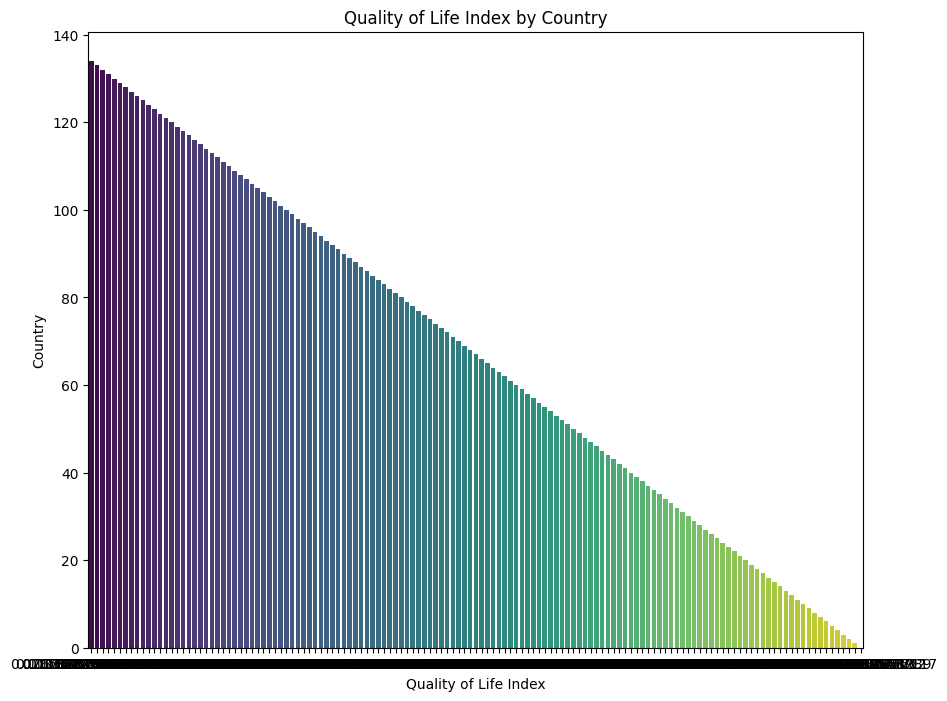

In [32]:


# 3. Ranking the Countries
merged_data['Quality of Life Index'] = normalized_data['Quality of Life Index']
# Visualize the results
plt.figure(figsize=(12, 6))
plt.barh(merged_data['Country or region'], merged_data['Quality of Life Index'])
plt.xlabel('Quality of Life Index')
plt.ylabel('Country')
plt.title('Quality of Life Index by Country')
plt.show()
# Plotting the results
plt.figure(figsize=(10, 8))
sns.barplot(x='Quality of Life Index', y=merged_data.index, data=merged_data.sort_values('Quality of Life Index', ascending=False), palette='viridis')
plt.xlabel('Quality of Life Index')
plt.ylabel('Country')
plt.title('Quality of Life Index by Country')
plt.show()